# 获得前n个主成分

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [15]:
def demean(X):
    return X - np.mean(X,axis=0)
X = demean(X)

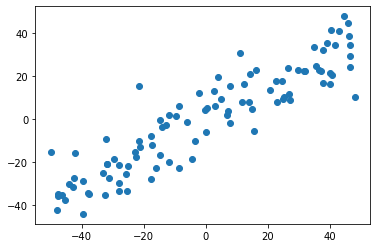

In [16]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [17]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)
def df(w,X):
    return X.T.dot(X.dot(w)) * 2. / len(X)
def direction(w):
    return w / np.linalg.norm(w)
def first_component(X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w,X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [18]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.79362179, 0.60841142])

In [19]:
X2 = X - X.dot(w).reshape(-1, 1) * w

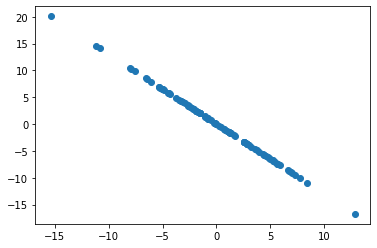

In [20]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [21]:
w2 = first_component(X2, initial_w, eta)
w2

array([-0.60840702,  0.79362516])

In [22]:
w.dot(w2)

5.54049932982581e-06

In [23]:
def first_n_components(n, X, eta = 0.01, n_iters = 1e4, epsilon = 1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    
    return res
        

In [24]:
first_n_components(2, X)

[array([0.7936218 , 0.60841141]), array([-0.60840846,  0.79362406])]